<a href="https://colab.research.google.com/github/VLNTNF/online-shoppers-dataset/blob/main/Online_Shoppers_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests

In [2]:
url = "https://www.afm-telethon.fr/telethon/bref/parrains-resultats-telethon-1379"

reponse = requests.get(url)
reponse.status_code

200

In [3]:
html = reponse.content

In [4]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(html, 'html.parser')
element = soup.select_one('td')
text_data = [element.get_text() for element in soup.select('td')]
annee, parrain, montant = text_data[3::3], text_data[4::3], text_data[5::3]

In [5]:
import pandas as pd
df = pd.DataFrame({"annee":annee,
                  "parrain":parrain,
                  "montant":montant})
df.head()

,annee,parrain,montant
0,1987,Jerry LEWIS,29 650 000 €
1,1988,Mireille MATHIEU,28 490 000 €
2,1989,Alain DELON,40 930 000 €
3,1990,Claudia CARDINALE,46 510 000 €
4,1991,"Jerry LEWIS, Mireille MATHIEU et Ornella MUTTI",38 650 000 €


In [6]:
df["annee"] = df.annee.astype(int)
df["montant"] = df.montant.str.replace("\D", '').astype(int)
df.dtypes

annee       int64
parrain    object
montant     int64
dtype: object

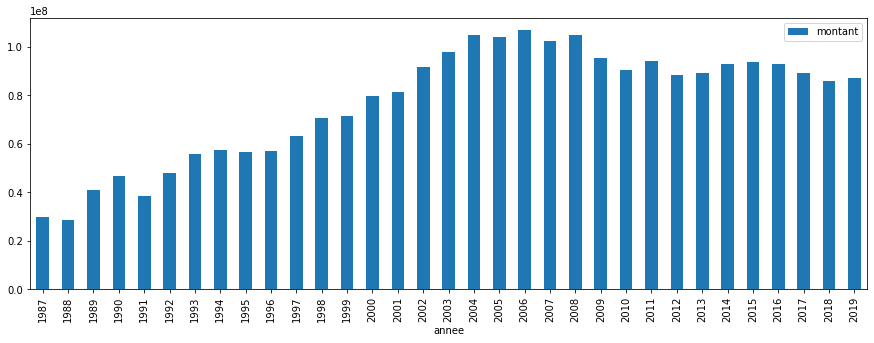

In [7]:
ax = df.plot(kind='bar', x="annee", figsize=(15,5))